In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import Word2Vec

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("engtamilTrain.csv")
df

,Unnamed: 0,en,ta
0,0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."
...,...,...,...
166866,166866,"Soon to be released, 'Silandhi' is produced by...",விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867,166867,"An MHP deputy publicly stated, ""Let them die.""\n",தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868,166868,And Aaron shall make an atonement on the horns...,வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869,166869,"Like the CWC, the UPF is part of the governmen...","இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச..."


In [10]:
df = df.drop(["Unnamed: 0"],axis=1)
df

,en,ta
0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."
...,...,...
166866,"Soon to be released, 'Silandhi' is produced by...",விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867,"An MHP deputy publicly stated, ""Let them die.""\n",தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868,And Aaron shall make an atonement on the horns...,வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869,"Like the CWC, the UPF is part of the governmen...","இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச..."


In [11]:
english = df["en"]
tamil =df["ta"]
english = english.head(1000)
tamil = tamil.head(1000)


In [12]:
english

0      MMA vice president Qazi Hussain Ahmad declared...
1      Information has surfaced in recent years sugge...
2      And Azor begat Sadoc; and Sadoc begat Achim; a...
3      She says she knows what is going on, but can d...
4      And be it indeed that I have erred, my error r...
                             ...                        
995    A face that stays on in people's mind is impor...
996    According to a report distributed by the Pales...
997    In a fundraising letter to big contributors, B...
998    It is entirely appropriate that outraged prote...
999    Against him there exists nothing, and he knows...
Name: en, Length: 1000, dtype: object

# CREATING SMALL TOKENS

In [16]:
def Token(sentence):
    df = sentence
    sentences = [sentence.split() for sentence in df ]
    print(sentences)
    return sentences

In [17]:
engsent = Token(english)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [18]:
tamsent = Token(tamil)

[['MMA', 'கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்:', '``நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல.'], ['சமீபகாலத்தில்', 'சில', 'தகவல்கள்', 'யூலியஸ்', 'ரோசன்பேர்க்', 'ஒரு', 'வித', 'உளவுச்செய்தியை', 'சோவியத்', 'அதிகாரிகளுக்கு', 'இரண்டாம்', 'உலகப்போரின்போது', 'அனுப்பியதில்', 'சம்பந்தப்பட்டு', 'இருந்ததாக', 'வெளிவந்துள்ளன.'], ['ஆசோர்', 'சாதோக்கைப்', 'பெற்றான்;', 'சாதோக்கு', 'ஆகீமைப்', 'பெற்றான்;', 'ஆகீம்', 'எலியூதைப்', 'பெற்றான்;'], ['என்ன', 'நடக்கிறது', 'என்பது', 'தமக்கு', 'தெரியும்', 'என்றும்', 'ஆனால்,', 'தம்மால்', 'எதுவும்', 'செய்யமுடியாது', 'என்றும்', 'கடிதம்', 'எழுதியிருந்தார்.'], ['நான்', 'தப்பிநடந்தது', 'மெய்யானாலும்,', 'என்', 'தப்பிதம்', 'என்னோடேதான்', 'இருக்கிறது'], ['டால்ரிம்பிளினுடைய', 'அறிவுஜீவித்', 'தொடுவானத்திற்கு', 'அப்பால்', 'எவ்வளவோ', 'தொலைவில்', 'இருந்தன'], ['இந்த', 'அமைப்புக்களில்', 'British', 'Tamil', 'Forum,', 'La', 'Maison', 'du', 'Tamil', 'Eelam', '(France),', 'the', 'Canadian', 'Tamil', 'Congress,', 'Swiss',

# CREATING MODEL

In [27]:
def Model(langsentence,modelname):
    model = Word2Vec(langsentence,min_count=1)
    print(model)
    model.save(modelname)
    # fit pca model to vectors
    x = model.wv.vectors
    pca = PCA(n_components = 2)
    result = pca.fit_transform(x)
    
    import matplotlib.pyplot as plt
    # scatter plot
    plt.scatter(result[:, 0],result[:, 1])
    words = list(model.wv.index_to_key)
    for i,word in enumerate(words):
        plt.annotate(word,xy = (result[i,0],result[i,1]))
    plt.show

Word2Vec<vocab=7300, vector_size=100, alpha=0.025>


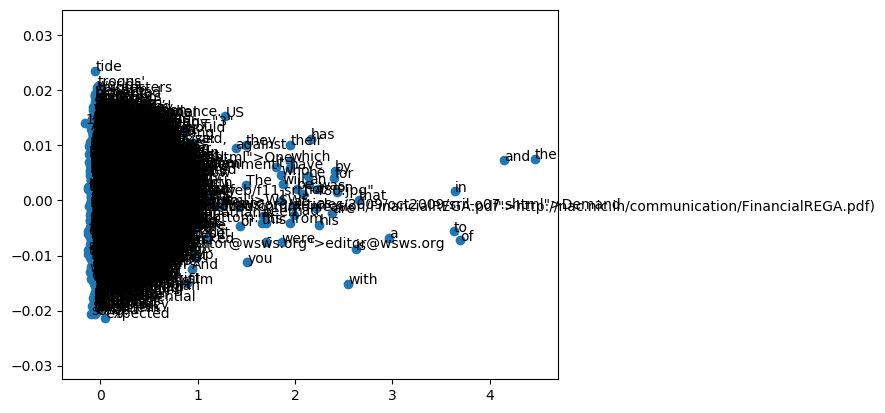

In [28]:
Model(engsent,"engmodel.bin")

Word2Vec<vocab=9882, vector_size=100, alpha=0.025>


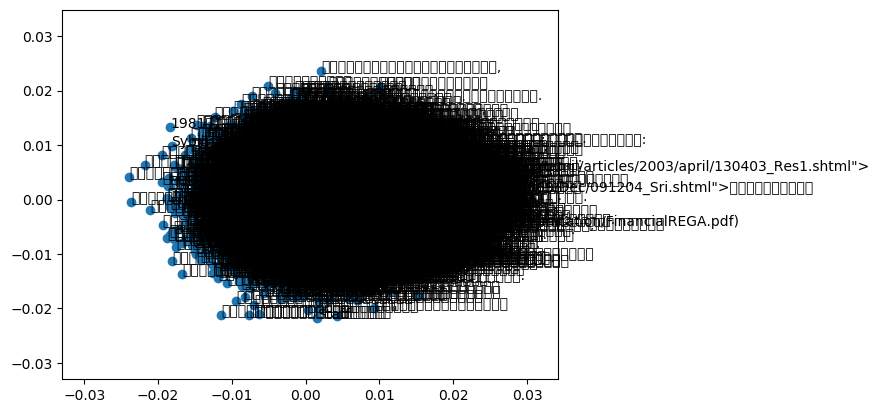

In [29]:
Model(tamsent,"tammodel.bin")